Data analysis su Rotten Tomato Reviews database

In [44]:
from math import nan
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import shutil

Creazione dataset

In [2]:
os.environ['KAGGLE_USERNAME'] = 'YOUR_USER'
os.environ['KAGGLE_KEY'] = 'YOUR_KEY'


In [3]:
!pip install kaggle


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.1 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 659.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Obtaining depende

In [15]:
!kaggle datasets download -p ./data -d andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews  --unzip 

Dataset URL: https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews
License(s): CC0-1.0




  0%|          | 0.00/152M [00:00<?, ?B/s]
  1%|          | 1.00M/152M [00:00<01:04, 2.44MB/s]
  2%|1         | 3.00M/152M [00:00<00:27, 5.70MB/s]
  3%|3         | 5.00M/152M [00:00<00:20, 7.65MB/s]
  5%|4         | 7.00M/152M [00:00<00:16, 8.98MB/s]
  5%|5         | 8.00M/152M [00:01<00:16, 9.21MB/s]
  7%|6         | 10.0M/152M [00:01<00:15, 9.91MB/s]
  8%|7         | 12.0M/152M [00:01<00:13, 10.6MB/s]
  9%|9         | 14.0M/152M [00:01<00:13, 10.7MB/s]
 11%|#         | 16.0M/152M [00:01<00:12, 11.0MB/s]
 12%|#1        | 18.0M/152M [00:02<00:12, 11.1MB/s]
 13%|#3        | 20.0M/152M [00:02<00:12, 11.2MB/s]
 14%|#4        | 22.0M/152M [00:02<00:12, 11.2MB/s]
 16%|#5        | 24.0M/152M [00:02<00:11, 11.2MB/s]
 17%|#7        | 26.0M/152M [00:02<00:11, 11.4MB/s]
 18%|#8        | 28.0M/152M [00:02<00:11, 11.2MB/s]
 20%|#9        | 30.0M/152M [00:03<00:11, 11.2MB/s]
 21%|##1       | 32.0M/152M [00:03<00:11, 11.2MB/s]
 22%|##2       | 34.0M/152M [00:03<00:11, 11.2MB/s]
 24%|##3       | 36.

In [16]:
df=pd.read_csv('./data/rotten_tomatoes_movie_reviews.csv')

Exploratory Data Analysis e Data Wrangling

In [17]:
df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [18]:
print(f"Dimensioni dataset {df['reviewId'].size}")
for column in df.columns:
    print(f"Valori unici per colonna {column} : {df[column].unique().size}")

Dimensioni dataset 1444963
Valori unici per colonna id : 69263
Valori unici per colonna reviewId : 1432569
Valori unici per colonna creationDate : 8510
Valori unici per colonna criticName : 15510
Valori unici per colonna isTopCritic : 2
Valori unici per colonna originalScore : 1730
Valori unici per colonna reviewState : 2
Valori unici per colonna publicatioName : 2707
Valori unici per colonna reviewText : 1359772
Valori unici per colonna scoreSentiment : 2
Valori unici per colonna reviewUrl : 1138351


In [20]:
#Approssimazione iniziale delle dimensioni del graph dataset
nodi = df["criticName"].unique().size + df["id"].unique().size
archi = df["reviewId"].unique().size

print(f"Reviews = G(N={nodi},L={archi})")

Reviews = G(N=84773,L=1432569)


In [21]:
#Degree distribution (recensori)
degree = df["criticName"].value_counts()
print(f"Grado minimo: {degree.min()}")
print(f"Grado massimo: {degree.max()}")

Grado minimo: 1
Grado massimo: 13274


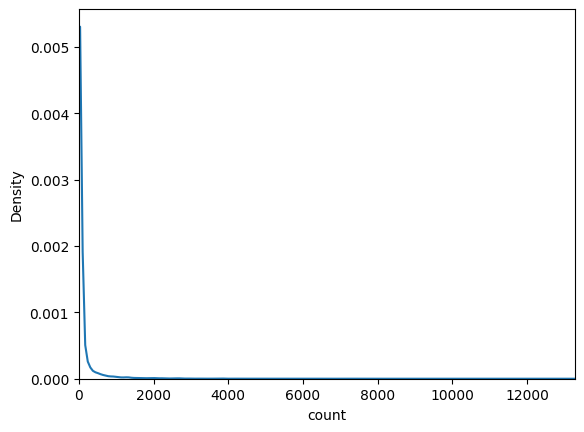

In [24]:
#Plot Distribuzione
dist = sns.kdeplot(degree)
dist.set_xlim(0,13274)
plt.show()

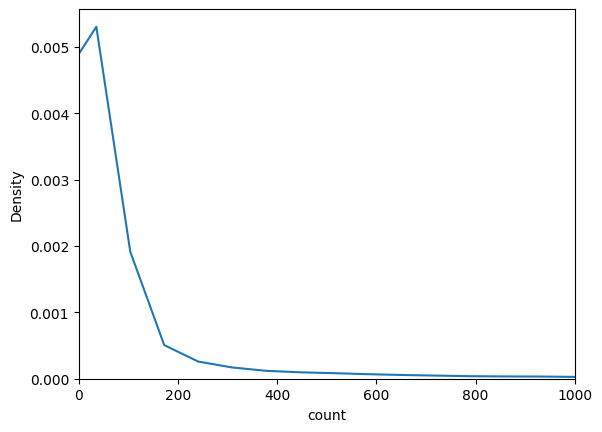

In [25]:
#"Zoom" sulla parte centrale del grafo"
dist = sns.kdeplot(degree)
dist.set_xlim(0,1000)
plt.show()

In [26]:
#Controllo su diverse formati dello score dato a un film
df["originalScore"].describe()

count     1009745
unique       1729
top           3/5
freq       116711
Name: originalScore, dtype: object

In questo dataset l'assenza di recensione numeriche può ossere compensata approssimando dal valore score sentiment (POSITIVE o NEGATIVE); recensioni saranno normalizzate tra 0 e uno sfruttando la struttura "valore/max_valore" per calcolare un punteggio float valido per tutti.

In [27]:
regex = re.compile('[^a-zA-z]')

#controllo voto alfabetico (A;B;C;D;E;A-;+B...)
def convert_score_alphabetic(valore):
    valore = valore.lower()
    #rimozione caratteri non alfabetici, per semplicità si converte solo il numero ignorando a eventuali + o -
    valore = regex.sub('', valore)

    score_numeroco = nan
    if valore == 'a':
        score_numeroco = 1.0
    elif valore == 'b':
        score_numeroco = 0.75
    elif valore == 'c':
        score_numeroco = 0.5
    elif valore == 'd':
        score_numeroco = 0.25
    elif valore == 'e':
        score_numeroco = 0.0

    #se non sono state identificate lettere, restituisco nan come segnalatore
    return score_numeroco

    #nel caso il voto sia un valore numerico
def convert_pure_number(valore,score_stringa):
    #bisogna differenziare cosa intendeva l'utente, possiamo assumere le seguenti scale:
    # 0 - 5
    # 0 - 10
    # 0 - 100
    #la prima e la seconda si intersecano, per fare un approssimazione è necessario basarsi sul sentimento
    score_numerico = float(valore)
    if not np.isnan(score_numerico):
        #se il voto e <= a 5 ma comunque positivo assumiamo che sia in scala 0 -5
        if score_numerico <= 5:
            if score_stringa == "POSITIVE":
                score = score_numerico / 5
                #se il voto e <= a 5 e negativp assumiamo che sia in scala 0 - 10
            else:
                score = score_numerico / 10
        elif score_numerico < 10:
            score = score_numerico/10
        elif score_numerico <= 100:
            score = score_numerico / 100
        else:
            score = score_numerico / 1000

        return score

def create_floatScore(valore, score_sentiment):
    #Creo un voto di default a partire sallo score sentiment nel caso non sia possibile convertire l'original score
    default_score = 0.2
    if score_sentiment == "POSITIVE":
        default_score = 0.8
    #converto a stringa nel caso sia un numero
    valore = str(valore)
    #tento conversione voto alphabetica
    score_numerico = convert_score_alphabetic(valore)
    if not np.isnan(score_numerico):
        return score_numerico

    #non è un voto alfabetico, procedo col controllo numerico
    #Tento conversione con voalore in formato voto/voto_max
    try:
        if "/" in valore:
            valore_list = valore.split("/")
            #ignoro eventuali + o - al punteggio
            score = abs(float(valore_list[0])/float(valore_list[1]))
            #il voto deve essere compreso tra 0 e 1
            if score > 1:
                score = 1.
            elif score < 0:
                score = 0.
            return score
    except:
        pass

    #Tento la conversione di un numero puro
    try:
        score = convert_pure_number(valore,score_sentiment)
        #se non viene restituito un numero nel valore 0 1 significa che il numero è troppo ambiguo per essere convertito
        if score >= 0 and score >= 1:
            return score
    except:
        pass

    #Se non si è riuscito ad applicare alcuna conversione allora ci si basa su un valore di default assegnato tramite sentiment:
    return default_score

df['scoreFloat'] = df.apply(lambda x: create_floatScore(x['originalScore'], x['scoreSentiment']), axis=1)

In [28]:
print(f"Score non convertiti: {df['scoreFloat'].isna().sum()}")
print(f"Review senza score_sentiment: {df['scoreSentiment'].isna().sum()}")

Score non convertiti: 0
Review senza score_sentiment: 0


Unione datasets del progetto: verrò utilizzato il secondo insieme di dati per incorporare informazioni sui movies

In [29]:
movies = pd.read_csv('./data/rotten_tomatoes_movies.csv')
movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [30]:
#Merge col secondo dataset
df_merged = df.merge(
    right = movies,
    on = "id",
)
#rimozione colonne non utili
df_merged = df_merged[
    ["id",
     "reviewId",
     "creationDate",
     "criticName",
     "isTopCritic",
     "reviewState",
     "scoreSentiment",
     "scoreFloat",
     "title",
     "releaseDateStreaming",
     "releaseDateTheaters",
     "runtimeMinutes",
     "genre"]
]

In [31]:
#Correzzione creationDate della review
def adjust_creation_date(creationDate,releaseDateStreaming,releaseDateTheaters):
    #se una recensione non ha una data di creazione valida (minore del caricamento del film) allora
    #viene sostituita dalla di rilascio del film cheè la prima logica dalla quale una recensione su di esso
    #può esistere.
    #il formato stringhe permette di fare un confronto diretto
    #setto il valore di default al minimo del datavase
    new_date = creationDate
    #do la precedenza alla data di rilascio nei cinema se esiste lasciando sovrascrivere la data di rilascio streaming
    if not pd.isnull(releaseDateStreaming) and creationDate < releaseDateStreaming:
        new_date = releaseDateStreaming
    elif not pd.isnull(releaseDateTheaters) and creationDate < releaseDateTheaters:
        new_date = releaseDateTheaters
    else:
        new_date = "1800-01-01"

    #se non c'è almeno una data di rilascio non posso verificare la data
    return new_date

df_merged['creationDate'] = df_merged.apply(lambda x: adjust_creation_date(x['creationDate'],x['releaseDateStreaming'], x['releaseDateTheaters']), axis=1)

In [32]:
#Correzzione dei movietitle mancanti
def adjust_title(title,movieId):
    #se il title è a null lo sostituisco con l'id poichè nel database è comunque una stringa significativa
    if pd.isnull(title):
        split_id = movieId.split("_")
        split_id = " ".join(split_id)
        return split_id

    return title

df_merged['title'] = df_merged.apply(lambda x: adjust_title(x['title'],x['id']), axis=1)

In [33]:
#Per riempire i runtimeminutes non potendo fare paragone di similarità con altri film utilizziamo il valore 0
avg = df_merged['runtimeMinutes'].mean()
df_merged["runtimeMinutes"] = df_merged['runtimeMinutes'].fillna(avg)

In [34]:
#Revisione del dataset
for col in df_merged.columns:
    print(f"Nan in {col} : {df_merged[col].isna().sum()}")

Nan in id : 0
Nan in reviewId : 0
Nan in creationDate : 0
Nan in criticName : 0
Nan in isTopCritic : 0
Nan in reviewState : 0
Nan in scoreSentiment : 0
Nan in scoreFloat : 0
Nan in title : 0
Nan in releaseDateStreaming : 113821
Nan in releaseDateTheaters : 285473
Nan in runtimeMinutes : 0
Nan in genre : 23450


Siamo in una situazione di dati sufficienti a procedere con la crazione del database, le mancanze in genre non rappresentano un problema per le operazioni di data analysis del progetto.

Creazione database Neo4j

Creazione liste di film dalla colonna id e dei recensori dalla colonna criticName

In [35]:
#Non ci sono entry senza titolo o criticName dunque posso passare direttamente
#alla creazione del set senza dover ripulire quei campi
print(f"Recensioni senza film: {df_merged['id'].isna().sum()}")
print(f"Recensioni senza nome recensore: {df_merged['criticName'].isna().sum()}")
#usando dei set l'insieme non conterrà ripetizioni
films_titles = set(df_merged['id'])
critics_names = set(df_merged['criticName'])
print(f"Numero film: {len(films_titles)}")
print(f"Numero recensori: {len(critics_names)}")

Recensioni senza film: 0
Recensioni senza nome recensore: 0
Numero film: 69260
Numero recensori: 15509


Creazione di alcuni dizionari di supporto per la creazione del dataset

In [36]:
#Creazione dizionari critcName : isTop
dict_critic_top = df_merged.set_index("criticName")["isTopCritic"].to_dict()
#Creazione dizionarion id: "title","releaseDateTheaters","runtimeMinutes","genre"
dict_movie_title = df_merged.set_index("id")["title"].to_dict()
dict_movie_date = df_merged.set_index("id")["releaseDateTheaters"].to_dict()
dict_movie_runt = df_merged.set_index("id")["runtimeMinutes"].to_dict()
dict_movie_genre = df_merged.set_index("id")["genre"].to_dict()

Creazione file da importare in Neo4J

In [46]:
#Creazione file critici
shutil.rmtree("csv-dump")
os.mkdir("csv-dump")
count = 0
with open('./csv-dump/critics.csv', encoding='utf-8',mode='w', newline='') as critics_file:
    #definizione header
    writer = csv.DictWriter(critics_file, fieldnames=["criticNumId","criticName", "isTop"])

    for critic in critics_names:
        critico = {
            "criticNumId" : count,
            "criticName"  : critic,
            "isTop"       : bool(dict_critic_top[critic])
        }
        writer.writerow(critico)
        count = count+1

#Creazione file movies
count = 0
with open('./csv-dump/movies.csv', encoding='utf-8', mode='w', newline='') as movies_file:
    #definizione header
    writer = csv.DictWriter(movies_file, fieldnames=["movieNum_id","movieId","movieTitle","releaseDateTheaters","runtimeMinutes","genre"])

    for movie in films_titles:
        movie = {
            "movieNum_id"         : count,
            "movieId"             : movie,
            "movieTitle"          : dict_movie_title[movie],
            "releaseDateTheaters" : dict_movie_date[movie],
            "runtimeMinutes"      : dict_movie_runt[movie],
            "genre"               : dict_movie_genre[movie]
        }
        writer.writerow(movie)
        count = count + 1

#creazione file reviews
count = 0
with open('./csv-dump/reviews.csv', encoding='utf-8', mode='w', newline='') as reviews_file:
    #definizione header
    writer = csv.DictWriter(reviews_file, fieldnames=["reviewNumId", "criticName", "movieTitle", "reviewId", "creationDate", "scoreSentiment", "scoreFloat"])

    for id in df.index:
        review = {
            "reviewNumId"     : count,
            "criticName"      : df["criticName"][id],
            "movieTitle"      : df["id"][id],
            "reviewId"        : df["reviewId"][id],
            "creationDate"    : df["creationDate"][id],
            "scoreSentiment"  : df["scoreSentiment"][id],
            "scoreFloat"      : df["scoreFloat"][id]
        }
        writer.writerow(review)
        count = count+1

Creazione Database in neo4J.


Prima di procedere è necessario creare e avviare un database locale di neo4j  cui connettersi e installare i plug in APOC e GDS per poter eseguire tutte le queri successive.

Creazione Critics e index critics

In [134]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j://localhost"
AUTH = ("neo4j", "pomodoro")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

    # Get the name of all 42 year-olds
    driver.execute_query("MATCH (c:Critic) DELETE c")
    records, summary, keys = driver.execute_query(
        "LOAD CSV FROM 'file:///critics.csv' AS row MERGE (a:Critic {criticNumId: toInteger(row[0]), criticName: row[1], isTop:toBoolean(row[2])}) RETURN a.criticName, a.isTop Limit 10"
    )

    # Loop through results and do something with them
    for movie in records:
        print(movie)

    # Summary information
    print("The query `{query}` returned {records_count} records in {time} ms.".format(
        query=summary.query, records_count=len(records),
        time=summary.result_available_after,
    ))
    #Creazione index
    
    driver.execute_query("DROP INDEX critic_criticName_index IF EXISTS")
    driver.execute_query("CREATE INDEX critic_criticName_index FOR (c:Critic) ON (c.criticName)")

    driver.close()

<Record a.criticName='Olivia Cathcart' a.isTop=False>
<Record a.criticName='Michael Kostelnuk' a.isTop=False>
<Record a.criticName='Leo Seligsohn' a.isTop=True>
<Record a.criticName='Chinelo Anyadiegwu' a.isTop=True>
<Record a.criticName='George Elkind' a.isTop=False>
<Record a.criticName='Madison Brek' a.isTop=False>
<Record a.criticName='David Medsker' a.isTop=False>
<Record a.criticName='Billie Cohen' a.isTop=True>
<Record a.criticName='Kenneth Broome' a.isTop=False>
<Record a.criticName='Garrett Green' a.isTop=False>
The query `LOAD CSV FROM 'file:///critics.csv' AS row MERGE (a:Critic {criticNumId: toInteger(row[0]), criticName: row[1], isTop:toBoolean(row[2])}) RETURN a.criticName, a.isTop Limit 10` returned 10 records in 2 ms.


Creazione Movies e Index movies

Nota: non so perchè ma l'esecuzione tramite driver delle queri che iniziano con : non funziona e cypher segnala un errore di sintassi,la stessa query lanciata da terminale cypher funziona perfettamente.
Non sono riuscito a rintracciare la causa dell'errore quindi si lancino manualmente da terminale le query di creazione dei film e delle reviews.

In [135]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

    # Get the name of all 42 year-olds
    driver.execute_query("MATCH (m:Movie) DELETE m")
    records, summary, keys = driver.execute_query(
            """:auto LOAD CSV FROM 'file:///movies.csv' AS row
            CALL{WITH row MERGE (m:Movie {movieNumId: toInteger(row[0]), movieId: row[1], movieTitle: row[2], releaseDateTheaters: row[3], runtimeMinutes: toFloat(row[4]), genre: row[5]})
            }IN TRANSACTIONS OF 1000 ROWS"""
    )

    # Summary information
    print("The query `{query}` returned {records_count} records in {time} ms.".format(
        query=summary.query, records_count=len(records),
        time=summary.result_available_after,
    ))

    driver.execute_query("DROP INDEX movie_movieId_index IF EXISTS")
    driver.execute_query("CREATE INDEX movie_movieId_index FOR (m:Movie) ON (m.movieId)")

    driver.close()

CypherSyntaxError: {code: Neo.ClientError.Statement.SyntaxError} {message: Invalid input ':': expected
  "ALTER"
  "CALL"
  "CREATE"
  "DEALLOCATE"
  "DELETE"
  "DENY"
  "DETACH"
  "DROP"
  "DRYRUN"
  "ENABLE"
  "FOREACH"
  "GRANT"
  "INSERT"
  "LOAD"
  "MATCH"
  "MERGE"
  "NODETACH"
  "OPTIONAL"
  "REALLOCATE"
  "REMOVE"
  "RENAME"
  "RETURN"
  "REVOKE"
  "SET"
  "SHOW"
  "START"
  "STOP"
  "TERMINATE"
  "UNWIND"
  "USE"
  "USING"
  "WITH" (line 1, column 1 (offset: 0))
":auto LOAD CSV FROM 'file:///movies.csv' AS row"
 ^}

Create Reviews 

In [ ]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

    # Get the name of all 42 year-olds
    driver.execute_query(":auto CALL{MATCH ()-[r:REVIEWS]->() DELETE r}IN TRANSACTIONS OF 1000 ROWS")
    records, summary, keys = driver.execute_query(
        """:auto
            LOAD CSV FROM 'file:///reviews.csv' AS row
            CALL{
                WITH row
                MATCH (c:Critic {criticName:row[1]}), (m:Movie {movieId: row[2]})
                MERGE (c)-[:REVIEW {reviewNumId: toInteger(row[0]),reviewId:row[3], creationDate:row[4], scoreSentiment:row[5], scoreFloat:toFloat(row[6])}]->(m)
            }IN TRANSACTIONS OF 1000 ROWS"""
    )

    # Summary information
    print("The query `{query}` returned {records_count} records in {time} ms.".format(
        query=summary.query, records_count=len(records),
        time=summary.result_available_after,
    ))

    driver.close()

Domande con risoluzione applicate a Neo4j

DOMANDA 1

Un primo punto di interesse per studiare la rete di recensioni e capirne le dinamiche è valutare il grado dei nodi per identificare quali sono i recensori più prolifici; sia che vengano considerati rilevanti dalla piattaforma Rotten Tomato che di quelli più comuni.

Possiamo aggiunfere ai risultati anche gli intervalli di pubblicazione delle recensioni così da poter osservare se un individuo avesse pubblicato un numero di volte eccessivamente alto rispetto al periodo di tempo nel qualeè stato attivo.

In [136]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query(
        """
        match (cr:Critic)-[r:REVIEW]->()
        return cr.criticName, min(r.creationDate) as firstReview, max(r.creationDate) as lastReview, count(r) as nReview
        order by nReview Desc limit 10
        """
    )
    # Loop through results and do something with them
    for movie in records:
        print(movie)

    driver.close()

<Record cr.criticName='Emanuel Levy' firstReview='2000-01-01' lastReview='2022-05-26' nReview=13273>
<Record cr.criticName='Dennis Schwartz' firstReview='2000-01-01' lastReview='2023-04-08' nReview=13123>
<Record cr.criticName='Roger Moore' firstReview='1990-08-24' lastReview='2023-04-08' nReview=8411>
<Record cr.criticName='Roger Ebert' firstReview='1800-01-01' lastReview='2023-03-15' nReview=7364>
<Record cr.criticName='Brian Orndorf' firstReview='2000-01-01' lastReview='2023-04-06' nReview=7068>
<Record cr.criticName='Jeffrey M. Anderson' firstReview='2000-01-01' lastReview='2023-04-07' nReview=7051>
<Record cr.criticName='David Nusair' firstReview='2000-01-01' lastReview='2023-04-08' nReview=7013>
<Record cr.criticName='Frank Swietek' firstReview='1995-06-30' lastReview='2023-04-07' nReview=6727>
<Record cr.criticName='Rich Cline' firstReview='2001-12-10' lastReview='2023-04-04' nReview=6337>
<Record cr.criticName='Frederic and Mary Ann Brussat' firstReview='2000-01-01' lastReview=

Abbiamo ottenuto i critici più attivi e nessuno mostra un periodo di tempo di attività troppo breve da far sospettare dell'autenticità dall'account.

Nota: la data 1800-01-01 è usata come marker di un valore non disponibile nel dataset originale dunque la sua presenza non è inaccettabile anche se comunque sono presenti

DOMANDA 2

Una domanda analoga alla precedente è identificare i film più visti all'interno del database.
Possiamo introdurre una distinzione: considerare tutti i recensori oppure solo quelli considerati topCritic ovvero che la piattaforma Rotten Tomatoes reputa più rilevanti secondo criteri propri di attività, riconoscimento dell'account e altre metriche.
Possiamo poi paragonare i due risultati:

In [137]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query(
        """
        match (cr:Critic)-[r:REVIEW]->(m:Movie)
        where cr.isTop = false
        return m.movieId, m.movieTitle, count(r) as nRevs
        order by nRevs desc
        limit 10
        """
    )
    # Loop through results and do something with them
    print("Top 10 Films considerando tutti i critici")
    all_movies = []
    for movie in records:
        print(movie)
        all_movies.append(movie[0])
        
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query(
        """
        match (cr:Critic)-[r:REVIEW]->(m:Movie)
        where cr.isTop = true
        return m.movieId, m.movieTitle, count(r) as nRevs
        order by nRevs desc
        limit 10
        """
    )
    # Loop through results and do something with them
    print("--------------------------------------------")
    print("Top 10 Films considerandosolo i critici Top:")
    top_movies = []
    for movieTop in records:
        print(movieTop)
        top_movies.append(movieTop[0])

Top 10 Films considerando tutti i critici
<Record m.movieId='parasite_2019' m.movieTitle='Parasite' nRevs=768>
<Record m.movieId='ant_man_and_the_wasp_quantumania' m.movieTitle='Ant-Man and The Wasp: Quantumania' nRevs=624>
<Record m.movieId='joker_2019' m.movieTitle='Joker' nRevs=488>
<Record m.movieId='once_upon_a_time_in_hollywood' m.movieTitle='Once Upon a Time... In Hollywood' nRevs=469>
<Record m.movieId='avengers_endgame' m.movieTitle='Avengers: Endgame' nRevs=457>
<Record m.movieId='captain_marvel' m.movieTitle='Captain Marvel' nRevs=454>
<Record m.movieId='black_panther_2018' m.movieTitle='Black Panther' nRevs=430>
<Record m.movieId='star_wars_the_rise_of_skywalker' m.movieTitle='Star Wars: The Rise of Skywalker' nRevs=430>
<Record m.movieId='a_star_is_born_2018' m.movieTitle='A Star Is Born' nRevs=424>
<Record m.movieId='the_batman' m.movieTitle='The Batman' nRevs=417>
--------------------------------------------
Top 10 Films considerandosolo i critici Top:
<Record m.movieId=

Si può vedere immediatamente che i risultati sono differenti e come nella prima query compiano più film popolari degli ultimi anni mentre nel secondo riltato figurano pellicole meno popolari ma che hanno anche ricevuto più premiazioni
Si possono contare i film in comune nei due insiemi per ottenere un risultato preciso

In [83]:
print("Film comuni ai due risultati delle query")
print(set(all_movies).intersection(set(top_movies)))

Film comuni ai due risultati delle query
{'ant_man_and_the_wasp_quantumania', 'parasite_2019'}


DOMANDA 3

Critici Horror più rilevanti

Per valutare quale nodi abbiano una maggiore influenza all'interno di un genere cinematografico specifico sono necessari tre passaggi:
    a) Estrarre il sottografo delle critiche horror tramite graph projection
    b) Calcolare tramite misure di centralità gli horror più rilevanti in questo sottoinsieme
    c) Ordinare i film in ordine di misure di centralità
Data la struttura del database (critico)-REVIEW->(movie) è opportuno utilizzare misure di centralità basate sul grado di un nodo considerando quali hanno un influenza (numero di recensioni e quindi link) maggiore.

Per queste ragioni si è scelto di usare la funzione gds.degree.stream.

Crezione proiezione grafo per i film horror

In [140]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    try:
        records, summary, keys =driver.execute_query(
            """
                CALL gds.graph.drop('horrorRevs') YIELD graphName
            """
        )
    except:
        pass
    records, summary, keys =driver.execute_query(
        """
            MATCH (source:Critic)-[r:REVIEW]->(target:Movie) 
            WHERE r.scoreSentiment = "POSITIVE" and "Horror" in target.genre 
            WITH gds.graph.project(
                'horrorRevs', 
                source, 
                target,
                {
                    sourceNodeProperties: {criticNumId:source.criticNumId},
                    targetNodeProperties: {movieNumId:target.movieNumId}
                }
                )as g 
            RETURN g.graphName AS graph, g.nodeCount AS nodes,g.relationshipCount AS rels
        """
    )
    
    records, summary, keys = driver.execute_query(
        """
        call gds.degree.stream('horrorRevs') 
        yield nodeId, score
        RETURN gds.util.asNode(nodeId).criticName as criticName, score
        order by score desc limit 20
        """
    )
    # Summary information
    for mi_critic in records:
        print(mi_critic)

<Record criticName='Anton Bitel' score=321.0>
<Record criticName='Scott Weinberg' score=246.0>
<Record criticName='Dennis Schwartz' score=246.0>
<Record criticName='Ken Hanke' score=233.0>
<Record criticName='Felix Vasquez Jr.' score=192.0>
<Record criticName='Emanuel Levy' score=187.0>
<Record criticName='Jeffrey M. Anderson' score=170.0>
<Record criticName='Matt Brunson' score=155.0>
<Record criticName='Tim Brayton' score=127.0>
<Record criticName='Dustin Putman' score=103.0>
<Record criticName='Jennie Kermode' score=101.0>
<Record criticName='Fernando F. Croce' score=93.0>
<Record criticName='C.H. Newell' score=92.0>
<Record criticName='Rob Gonsalves' score=87.0>
<Record criticName='Kat Hughes' score=79.0>
<Record criticName='Cole Smithey' score=78.0>
<Record criticName='Brian Orndorf' score=78.0>
<Record criticName='Walter Chaw' score=77.0>
<Record criticName='Matt Donato' score=77.0>
<Record criticName='David Nusair' score=76.0>


Note:Questa ricerca esclude in automatico i film perchè essendo i nodi destinatari dei link DIRETTI non hanno archi in uscita e dunque ricevono uno score nullo dalla funzione invocata e vengono escluse dal limite sui risultati

DOMANDA 4

Film Horror più rilevanti

Per valutare la rilevanza di un film dobbiamo considerare quante recensioni lo riguardano  considerando le dimensioni del gruppo di utenti che lo hanno recensito e il loro coinvolgimento nella comunity horror.

In altre parole ci serve valutare la centralità del nodo in funzione dei path di cui fa parte e quindi utilizzare una misura come la betweenness centrality con la funzione gds.betweenness.stream; più adatta a questo task rispetto alla degree centrality.

Inoltre è necessario filtrare i risultati sui movie perchè anche i nodi Critico con più archi, facendo parte di molti shortest paths (quelli che partono o che terminano con loro) e riceveranno uno score alto da questo metodo.


In [142]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    try:
        records, summary, keys =driver.execute_query(
            """
                CALL gds.graph.drop('undirectedHorrorRevs') YIELD graphName
            """
        )
    except:
        pass
    records, summary, keys =driver.execute_query(
        """
            MATCH (source:Critic)-[r:REVIEW]->(target:Movie) 
            WHERE r.scoreSentiment = "POSITIVE" and "Horror" in target.genre 
            WITH gds.graph.project(
                'undirectedHorrorRevs',
                source, 
                target,
                {
                    sourceNodeProperties: {criticNumId:source.criticNumId},
                    targetNodeProperties: {movieNumId:target.movieNumId}
                },
                {undirectedRelationshipTypes: ['*']}
                )as g 
            RETURN g.graphName AS graph, g.nodeCount AS nodes,g.relationshipCount AS rels  
        """
    )

    records, summary, keys = driver.execute_query(
        """
        call gds.betweenness.stream('undirectedHorrorRevs') 
        yield nodeId, score
        where not gds.util.asNode(nodeId).movieId is null
        RETURN gds.util.asNode(nodeId).movieId as criricName, score
        order by score desc limit 10
        """
    )
    # Summary information
    for mi_films in records:
        print(mi_films)

<Record criricName='let_me_in' score=448928.04114027834>
<Record criricName='let_the_right_one_in' score=395866.8598411403>
<Record criricName='saint_maud' score=367068.6054560554>
<Record criricName='dawn_of_the_dead' score=253107.91030931062>
<Record criricName='hatching' score=206134.425352606>
<Record criricName='land_of_the_dead' score=175986.35425702116>
<Record criricName='1007818-frankenstein' score=165088.02449056448>
<Record criricName='carrie' score=153642.59551391224>
<Record criricName='blood_quantum' score=145298.90259661412>
<Record criricName='sleepy_hollow' score=136872.25779412896>


DOMANDA 5

Sistema di Reccomandation
E' possibile creare un sistema di raccomandazioni confrontando gli utenti che hanno preferenze simili in termini di preferenze cinematografiche.
Grazie alla struttura a grafo possiamo implementare direttamente un algoritmo di k-neighbors tramote query e ottenere le coppie di utenti più simili seguendo un approccio di reccomendation user-based.

Dopo di che selezioniamo un critico e come suggerimenti possiamo prendere altri film che sono stati apprezzati da un suo "simile" e che lui non ha guardato.

Stavolta restringiamo il campo alla community attorno al genere Sci-fi
 

In [143]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

    records, summary, keys =driver.execute_query(
        """
            match (cr1:Critic)-[r1:REVIEW]->(mv1:Movie)<-[r2:REVIEW]-(cr2:Critic)
            where "Sci-fi" in mv1.genre
                and cr1.criticName <> cr2.criticName
                and r1.scoreSentiment = "POSITIVE" and r2.scoreSentiment = "POSITIVE"
            return cr1.criticName, cr2.criticName, count(mv1) as commonMovies
            order by commonMovies DESC limit 50
        """
    )

    #estrazione coppie di nomi di utenti simili
        

In [144]:
for critics in records:
    print(critics)
    
#Selezioniamo i primi due simili

node1 = records[0][0]
node2 = records[0][1]

<Record cr1.criticName='Ken Hanke' cr2.criticName='Emanuel Levy' commonMovies=61>
<Record cr1.criticName='Emanuel Levy' cr2.criticName='Ken Hanke' commonMovies=61>
<Record cr1.criticName='Emanuel Levy' cr2.criticName='Scott Weinberg' commonMovies=51>
<Record cr1.criticName='Scott Weinberg' cr2.criticName='Emanuel Levy' commonMovies=51>
<Record cr1.criticName='Dennis Schwartz' cr2.criticName='Ken Hanke' commonMovies=49>
<Record cr1.criticName='Ken Hanke' cr2.criticName='Dennis Schwartz' commonMovies=49>
<Record cr1.criticName='Ken Hanke' cr2.criticName='Scott Weinberg' commonMovies=46>
<Record cr1.criticName='Scott Weinberg' cr2.criticName='Ken Hanke' commonMovies=46>
<Record cr1.criticName='Dennis Schwartz' cr2.criticName='Emanuel Levy' commonMovies=43>
<Record cr1.criticName='Emanuel Levy' cr2.criticName='Dennis Schwartz' commonMovies=43>
<Record cr1.criticName='Ken Hanke' cr2.criticName='Matt Brunson' commonMovies=40>
<Record cr1.criticName='Matt Brunson' cr2.criticName='Ken Hanke' c

In [145]:
print(node1," - ",node2)
#Estraiamo i nodi che sono stati visti dal primo nodo, ma non dal secondo
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    query = """
            match (cr1:Critic {criticName:'"""+node1+"""'})-[r1:REVIEW]->(mv1:Movie)<-[r2:REVIEW]-(cr2:Critic)
            where "Sci-fi" in mv1.genre
                and cr2.criticName <> '"""+node2+"""'
                and r1.scoreSentiment = "POSITIVE"
            return distinct mv1.movieTitle
        """
    
    records, summary, keys =driver.execute_query(
        query
    )
    
    for suggestion in records:
        print(suggestion)

Ken Hanke  -  Emanuel Levy
<Record mv1.movieTitle='Frankenstein Unbound'>
<Record mv1.movieTitle='Earth vs. the Flying Saucers'>
<Record mv1.movieTitle='The Four Sided Triangle'>
<Record mv1.movieTitle='Danger: Diabolik'>
<Record mv1.movieTitle='The Blob'>
<Record mv1.movieTitle='20 Million Miles to Earth'>
<Record mv1.movieTitle='King Kong vs. Godzilla'>
<Record mv1.movieTitle="The Invisible Man's Revenge">
<Record mv1.movieTitle='Looker'>
<Record mv1.movieTitle='Zardoz'>
<Record mv1.movieTitle='Beginning of the End'>
<Record mv1.movieTitle='Things to Come'>
<Record mv1.movieTitle='Earth vs. the Spider'>
<Record mv1.movieTitle='The Monster That Challenged the World'>
<Record mv1.movieTitle='This Island Earth'>
<Record mv1.movieTitle='Tarantula'>
<Record mv1.movieTitle='My Stepmother Is an Alien'>
<Record mv1.movieTitle='The Invisible Man'>
<Record mv1.movieTitle='Mothra'>
<Record mv1.movieTitle='Robinson Crusoe on Mars'>
<Record mv1.movieTitle='The Brother From Another Planet'>
<Recor

DOMANDA 6
Confronto dimensioni delle comunità.

L'ultima analisi proposta prevede confrontare le comunità di critici attorno ad un genere per scoprire quali occupano un opzione maggiore dell'utenza della piattaforma.

In [146]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    records, summary, keys = driver.execute_query(
        """
        MATCH (cr:Critic)-[r:REVIEW]->(mv:Movie) 
        WHERE r.scoreSentiment = "POSITIVE" and "Romance" in mv.genre 
        return count(cr)
        """
    )
    print(f"Dimensioni community romance: {records[0][0]}")
    records, summary, keys = driver.execute_query(
        """
        MATCH (cr:Critic)-[r:REVIEW]->(mv:Movie) 
        WHERE r.scoreSentiment = "POSITIVE" and "Sci-fi" in mv.genre 
        return count(cr)
        """
    )
    print(f"Dimensioni community Sci-fi: {records[0][0]}")
    records, summary, keys = driver.execute_query(
        """
    MATCH (cr:Critic)-[r:REVIEW]->(mv:Movie) 
    WHERE r.scoreSentiment = "POSITIVE" and "Horror" in mv.genre 
    return count(cr)
        """
    )
    print(f"Dimensioni community Horror: {records[0][0]}")

Dimensioni community romance: 3092
Dimensioni community Sci-fi: 5355
Dimensioni community Horror: 14375
